In [52]:
import importlib
from library import data_preprocess as dp
import matplotlib.pyplot as plt
importlib.reload(dp)
import pickle

In [53]:
#https://www.kaggle.com/kazanova/sentiment140/data
file_path1 = "./data/training.1600000.processed.noemoticon.csv"

In [54]:
tweets = list(set(dp.load_data(file_path1, header=False, sep=',', usecols=[5])[5].str.lower().values))
print(len(tweets))
print(tweets[:2])

1577443
['@parkerkrhoyt ok, maybe a few. still less than any other language ', 'twilight  x']


In [55]:
unique_chars = dp.get_unique_chars(tweets)
print(len(unique_chars))
print(unique_chars)

150
['\t', ' ', '!', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '\x7f', '\xa0', '¡', '¢', '£', '¤', '¥', '¦', '§', '¨', '©', 'ª', '«', '¬', '\xad', '®', '¯', '°', '±', '²', '³', '´', 'µ', '¶', '·', '¸', '¹', 'º', '»', '¼', '½', '¾', '¿', '×', 'ß', 'à', 'á', 'â', 'ã', 'ä', 'å', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'ì', 'í', 'î', 'ï', 'ð', 'ñ', 'ò', 'ó', 'ø', 'ù', 'ú', 'û', 'ÿ', 'œ', 'š', 'ž', 'ƒ', 'ˆ', '˜', '–', '—', '‘', '’', '‚', '“', '”', '„', '†', '‡', '•', '…', '‰', '‹', '›', '€', '™']


In [ ]:
dp.get_char_presence(quotes)

In [56]:
print("Total number of tweets = ", len(tweets))
filter_tweets = dp.filter_data(tweets, "^[a-zA-Z !\"',.?\-\:\*]+$")
print(len(filter_tweets))
print(filter_tweets[:10])

Total number of tweets =  1577443
577841
['twilight  x', 'ohhhhhh ive wasted the day..... feel bad now ', 'magic vs lakers?? magic will take the prize........ ', 'finals are basically assessing how well you understood the content throughout the year. i should do fine ', "when fathers sleep their sons can't shower... ", "don't understand how this twitter works... ", "elvis pic of the day on igoogle is divine!  can't save it though ", "short weekend.. on my way home.. but i don't feel like goin bak  ..", "in the er. beanie's temp is still going up ", 'lust is soo depressing ']


In [57]:
special_chars = [' ', '!', '"', "'", '*', ',', '-', '.', ':', '?']
clean_tweets = dp.clean_data(tweets, "^[a-zA-Z !\"'*,\-.:?]+$", special_chars)

unique_chars = dp.get_unique_chars(clean_tweets)
print(len(unique_chars))
print(unique_chars)

clean_tweets = dp.tokenize(clean_tweets)

print(len(clean_tweets))
print(clean_tweets[:2])

# stats of number of tokens in the sentence
dp.get_len_stats(clean_tweets)

35
[' ', '!', "'", '*', ',', '-', '.', ':', '?', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
577841
[['twilight', 'x'], ['ohhhhhh', 'ive', 'wasted', 'the', 'day', 'threedots', 'feel', 'bad', 'now']]
min of length:  1
max of length:  65
average length:  13.439899557144612
mode of length:  7


In [67]:
MIN_NUM_TOKENS = 10
MAX_NUM_TOKENS = 40
clean_tweets = dp.filter_data_on_length(clean_tweets, MIN_NUM_TOKENS, MAX_NUM_TOKENS)
print(len(clean_tweets))

363682


In [68]:
word_freqs = dp.get_vocabulary(clean_tweets)

In [69]:
dp.get_vocabulary_stats(word_freqs)

Total vocabulary:  114293
average of frequency:  56.32225070651746
mode of frequency:  1


In [70]:
filtered_words = dp.filter_words(word_freqs, 20)
print("Number of filtered words = ", len(filtered_words))
sents = dp.get_sentences_with_words(clean_tweets, filtered_words)
print(len(sents))
print(sents[:5])

Number of filtered words =  10096
197055
[['magic', 'vs', 'lakers', '?', 'magic', 'will', 'take', 'the', 'prize', 'threedots'], ['short', 'weekend', 'threedots', 'on', 'my', 'way', 'home', 'threedots', 'but', 'i', 'dont', 'feel', 'like', 'goin', 'bak', 'threedots'], ['brb', '!', 'im', 'gotta', 'concentrate', 'on', 'makin', 'this', 'oatmeal', 'cuz', 'the', 'packet', 'dont', 'have', 'instructions', '!'], ['tears', 'for', 'fears', '-', 'everybody', 'wants', 'to', 'rule', 'the', 'world'], ['cozy', 'in', 'my', 'pajamas', 'threedots', 'church', 'tomorrow', 'in', 'the', 'morning']]


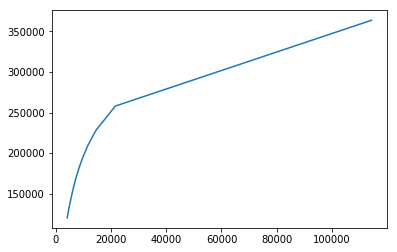

In [71]:
# Analysis for choosing optimum word freq cut off
freqsL = list(range(1, 80, 5))
num_words = []
num_sents = []
for x in freqsL:
    filtered_words = dp.filter_words(word_freqs, x)
    num_words.append(len(filtered_words))
    num_sents.append(len(dp.get_sentences_with_words(clean_tweets, filtered_words)))
plt.plot(num_words, num_sents)
plt.show()

In [72]:
# let's consider tweets whose vocabulary matches with that of jokes and quotes dataset
with open('./datasets/jokes_vocabulary.pickle', 'rb') as pickleFile:
    jokes_vocabulary = pickle.load(pickleFile)
    
with open('./datasets/quotes_vocabulary.pickle', 'rb') as pickleFile:
    quotes_vocabulary = pickle.load(pickleFile)

final_vocabulary = jokes_vocabulary
final_vocabulary.extend(quotes_vocabulary)
final_vocabulary = list(set(final_vocabulary))
print("vocabulary size = ", len(final_vocabulary))

final_clean_tweets = dp.get_sentences_with_words(clean_tweets, final_vocabulary)
print("Number of sentences: ", len(final_clean_tweets))
print(final_clean_tweets[:10])

vocabulary size =  11802
Number of sentences:  129304
[['tears', 'for', 'fears', '-', 'everybody', 'wants', 'to', 'rule', 'the', 'world'], ['today', 'is', 'scare', '-', 'of', '-', 'water', '-', 'day', '!', 'damn', 'my', 'body', 'smells', 'so', 'bad'], ['yes', '!', 'the', 'teen', 'choice', 'award', 'voting', 'is', 'finally', 'working'], ['starting', 'a', 'new', 'week', 'threedots', 'this', 'time', 'with', 'no', 'fear'], ['is', 'wrapping', 'up', 'a', 'long', 'day', ',', 'time', 'to', 'relax', '!', 'i', 'cant', 'believe', 'hockey', 'season', 'is', 'over', 'threedots'], ['is', 'packing', 'and', 'ready', 'for', 'an', 'early', 'flight', 'tomorrow', 'morning', '!', 'america', 'here', 'we', 'come', '!'], ['hungry', '.', 'hungry', '.', 'hungry', '.', 'no', 'food', 'at', 'home'], ['is', 'going', 'to', 'ride', 'her', 'horses', 'in', 'about', 'an', 'hour'], ['my', 'neighbors', 'next', 'door', 'are', 'now', 'fighting', 'with', 'the', 'ones', 'across', 'the', 'street', 'threedots', 'i', 'just', 'lov

In [73]:
# Let's append sos and eos tokens to all sentences
clean_tweets_final = [["sos"] + tokens + ["eos"] for tokens in final_clean_tweets]
clean_tweets_final = [' '.join(tokens) for tokens in clean_tweets_final]
clean_tweets_final = list(set(clean_tweets_final))

vocabulary_final = list(set(final_vocabulary + ["sos", "eos"]))
print("Final vocabulary size: ", len(vocabulary_final))
print("Number of sentences: ", len(clean_tweets_final))
print(clean_tweets_final[:5])
print(vocabulary_final[:10])

Final vocabulary size:  11802
Number of sentences:  129264
['sos last minute school shop in a couple of minutes . follow me guys ! eos', 'sos so my family is leaving for france tomorrow threedots without me eos', "sos i am now back at my grandparents ' and im super tired eos", 'sos wants to not be at work threedots someone save me eos', 'sos i wish i was in a park threedots in london threedots the sun is shining and im stuck inside eos']
['transformer', 'also', 'brave', 'climber', 'provoke', 'precise', 'sleeping', 'effect', 'similar', 'younger']


In [75]:
with open("./datasets/tweets.pickle","wb") as fop:
    pickle.dump(clean_tweets_final, fop)
    
with open("./datasets/tweets_vocabulary.pickle","wb") as fop:
    pickle.dump(vocabulary_final, fop)

In [76]:
print(clean_tweets_final[:5])

['sos last minute school shop in a couple of minutes . follow me guys ! eos', 'sos so my family is leaving for france tomorrow threedots without me eos', "sos i am now back at my grandparents ' and im super tired eos", 'sos wants to not be at work threedots someone save me eos', 'sos i wish i was in a park threedots in london threedots the sun is shining and im stuck inside eos']
